# Chapter 03: Data Wrangling with ``pandas``

In this chapter, I will:

* Discuss the process of data manipulation
* Learn how to explore an API to gather information
* Clean and reshape data with ``pandas``

This notebook will use daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). I will use the Global Historical Climatology Network - Daily (GHCND) dataset for the Boonton 1 station (GHCND:USC00280907).

<div class='alert alert-info' role='alert'>
    <span>See the documentation <a href='https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf'>here</a>.</span>
    <br>
    <span><b>Note</b>: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for "NCEI weather API" to find the updated one.</span>
</div>

## Setup

Here, I will import the main modules I'll need (``matplotlib.pyplot``, ``pandas``, and ``seaborn``) and create two ``DataFrame`` instance:

* A wide data format instance
* A long data format instance

In [5]:
# Necessary imports
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# File paths
wide_data_file_path = 'data/wide_data.csv'
"""
str: The relative pathway to the wide data format CSV.
"""
long_data_file_path = 'data/long_data.csv'
"""
str: The relative pathway to the long data format CSV.
"""

# Variables for building the DataFrame instances
use_columns_long = ['date', 'datatype', 'value']
"""
list of str: The column headings for the columns I want to use for the long data format DataFrame instance.
"""
parse_date_arg = ['date']
"""
[str]: This variable will be used to tell pandas to parse the DataFrame instances along the date format.
"""

# Creating the DataFrame instances: wide & long
wide_df = pd.read_csv(wide_data_file_path, parse_dates = parse_date_arg)
print(type(wide_df))
"""
pandas.core.frame.DataFrame: The wide format DataFrame instance.
"""
long_df = pd.read_csv(long_data_file_path, parse_dates = parse_date_arg, usecols = use_columns_long)
"""
pandas.core.frame.DataFrame: The long format DataFrame instance.
"""

# Sort columns in the long DataFrame instance
long_df = long_df[use_columns_long]

<class 'pandas.core.frame.DataFrame'>


## Background: Wide Data vs. Long Data

<figure>
    <img src='wide_data_vs_long_data.png' alt='Wide Data Vs. Long Data' width='100%' height='max'>
    <figcaption style='text-align:center;'>Wide Data vs. Long Data</figcaption>
</figure>

From the [Wikipedia article on wide and narrow data](https://en.wikipedia.org/wiki/Wide_and_narrow_data):

> Wide and narrow (sometimes un-stacked and stacked, or wide and tall) are terms used to describe two different presentations for tabular data.
> 
> Wide, or unstacked data is presented with each different data variable in a separate column.
>
> Narrow, stacked, or long data is presented with one column containing all the values and another column listing the context of the value. This is often easier to implement; addition of a new field does not require any changes to the structure of the table, however it can be harder for people to understand.

### Wide Data Format

When data is in a wide data format, my variables will have their own columns.

In [6]:
# Get the first x number of columns from the wide DataFrame instance
number_of_rows_to_get = 6
"""
int: The number of rows to display.
"""
wide_df.head(number_of_rows_to_get)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


This makes describing data with ``pandas`` easy.

In [7]:
wide_df.describe(include = 'all', datetime_is_numeric = True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


### Long Data Format

Long data ``DataFrame`` instances will essentially have 3 columns:

* The main identifier for information (in this case, the date)
* The datatype of the variable (the various variable names)
* The value of a datatype

Since my data has 3 variables per entry (``TMAX``, ``TMIN``, and ``TOBS``), each date will have three rows of data.

In [8]:
long_df.head(number_of_rows_to_get)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


Since plotting long format data in ``pandas`` can get quite tricky, I'll use ``seaborn`` instead.

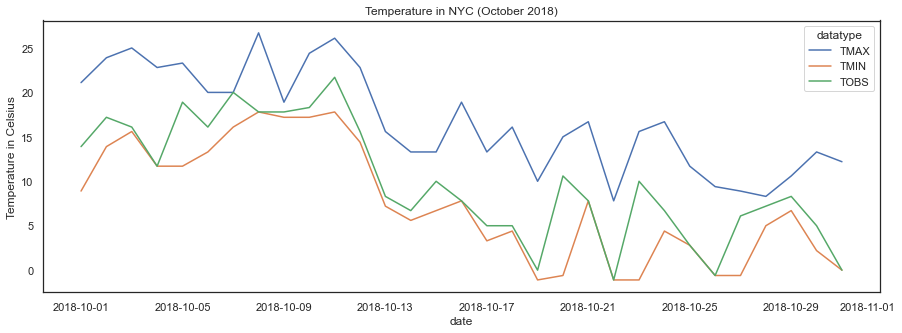

In [10]:
# Seaborn variables
y_label = 'Temperature in Celsius'
"""
str: The y-axis label for this seaborn plot.
"""
title = 'Temperature in NYC (October 2018)'
"""
str: The title for the seaborn plot.
"""
rc_dict = {'figure.figsize': (15, 5)}
"""
{str: (int, int)}: A dictionary defining the seaborn figure size.
"""
style_str = 'white'
"""
str: The style argument for the seaborn plot.
"""

# Drawing the plot
sns.set_theme(rc = rc_dict, style = style_str)
ax = sns.lineplot(
    data = long_df,
    x = 'date',
    y = 'value',
    hue = 'datatype'
)
ax.set_ylabel(y_label)
ax.set_title(title)
plt.show()

Now I can facet the plots using ``seaborn``.

In [ ]:
rc_dict = {'figure.figsize': (20, 10)}
font_scl = 2
"""
int: The scaling for fonts in the faceted plots.
"""